##Análisis Multivariado

###Realizar un pequeño análisis multivariado de datos, teniendo en cuenta las características de las observaciones. Generar al menos 3 gráficos asociados.

####Link al Dataset

Los datos los obtuvimos del siguiente [link](https://raw.githubusercontent.com/johanjohnson/DataCleaning---ChurnDataSet/main/churn_raw_data.csv)

##¿Qué buscamos mediante el análisis multivariado?

El propósito del análisis multivariante es medir, explicar y predecir el grado de relación que existe entre la variación (combinación lineal ponderada de las variables). El carácter multivariante del análisis descansa no sólo en el número de variables sino en las múltiples combinaciones existente entre las variables.

###Definición del problema

**Contexto**

Con el rápido desarrollo de la insdutria de la telecomunicación e incremento de la copetencia, se ha vuelto un desafío ampliar la base de usuarios y retener los existentes. Como es sabido, es más costosa la adquisición de nuevos usuarios que la retención de existentes. Es en este contexto que se vuelve fundamental aplicar analítica avanzada para predecir la posibilidad de que un cliente pueda abandonar la empresa e identificarlo antes de que su decisión este tomada y poder revertir la situación.

Librerías que utilizaremos

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import nltk
import warnings
import ipywidgets as widgets
import missingno as msno
!pip install sidetable
import sidetable
import plotly.express as px
from pandas.api.types import is_numeric_dtype
from pandas.core.frame import DataFrame
from prettytable import PrettyTable
from matplotlib.patches import Rectangle
from scipy.stats import norm
from scipy import stats
from statsmodels.graphics.gofplots import qqplot

warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
#Función para pasar a minúsculas los string de una lista o array:
def to_lowercase(arr):
 new_arr = []
 for x in list(range(0,len(arr))):
   new = arr[x].lower()
   new_arr.append(new)
 return new_arr

In [5]:
#Función para gráficos entre variables categóricas y numéricas:
def graph_cat_num(var_cat,var_num):
  fig, ax = plt.subplots(1,3,figsize=(30,10))
  p_1=sns.boxplot(data=df,x=var_cat,y=var_num,hue=var_cat,ax=ax[0])
  str_title='Relación entre {} y {}'.format(var_cat,var_num)
  p_1.set_title(str_title,size=20, loc= 'center')
  
  p_2=sns.violinplot(data=df,x=var_cat,y=var_num,hue=var_cat,ax=ax[1])

  p_3=sns.kdeplot(data=df,x=var_num,hue=var_cat,ax=ax[2])
  return

In [6]:
#Función para gráficos entre 2 variables categóricas:
def graph_cat_cat(var_x,var_hue):

  fig, ax = plt.subplots(1,2,figsize=(50,50))

  #Gráfico bar para ver freq de una categórica y agrupación según otra categórica:
  ex=sns.countplot(data=df,x=var_x,hue=var_hue,order=df[var_x].value_counts().index,ax=ax[0])
  ex.set_xticklabels(ex.get_xticklabels(),rotation=90);

  #Gráfico stacked-bar con porcentajes para ver la dist de una variable en las categorias:
  cross = pd.crosstab(df[var_hue] , df[var_x])
  columnas = cross.columns
  len_index = len(cross.index)
  dict_cross={}
  for col in columnas:
   total = cross[col].values.sum()
   val_cols =[]
   for index in range(0,len_index):
     valor = round(cross[col][index]/total,2)
     val_cols.append(valor)
     dict_cross[col]=val_cols
  
  pd.DataFrame(dict_cross,index=cross.index).T.plot(kind="bar", stacked=True, rot=90, figsize=(10,6), ax=ax[1]);
  print()
  tabla_dict = pd.DataFrame(dict_cross,index=cross.index).T
  print(f'Frecuencia según variable {var_hue}. (Cada fila suma 1)')
  if var_hue == 'churn':
    display(tabla_dict.sort_values('Yes',ascending=False))
  else:
    display(tabla_dict.sort_values(tabla_dict.columns[0],ascending=False))
  print()
  print(f'Frecuencia absoluta de cada categoria de la variable {var_x}')
  display(pd.DataFrame(df[var_x].value_counts()))
  print()
  return

In [7]:
#Determinamos cuántas columnas y rows queremos que nos muestre por defecto:
pd.options.display.max_rows = 200
pd.options.display.max_columns = 100

Carga del DataSet eliminando las columnas que no son necesarias

In [8]:
data=pd.read_csv("https://raw.githubusercontent.com/johanjohnson/DataCleaning---ChurnDataSet/main/churn_raw_data.csv")
df=pd.DataFrame(data)
df.drop(['Unnamed: 0','CaseOrder','Customer_id', 'Interaction',],axis=1,inplace=True)
df.head(3)

,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,NaN,68.0,Master's Degree,Part Time,28561.99,Widowed,Male,No,6.972566,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,171.449762,904.536110,5,5,5,3,4,4,3,4
1,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1.0,27.0,Regular High School Diploma,Retired,21704.77,Married,Female,Yes,12.014541,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.948015,800.982766,3,4,3,3,4,3,4,4
2,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4.0,50.0,Regular High School Diploma,Student,NaN,Widowed,Female,No,10.245616,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.440398,2054.706961,4,4,2,4,4,3,3,3


Definición de las columnas del Dataset:

Son datos demográficos, de comportamiento, opinión, consumo y facturación de los clientes. 

A continuación, se describe cada columna del Dataset: 

### Descripcion de Variables

Una de las primeras cosas que uno debe verificar es qué tipo de datos tengo. 

Inicialmente es poder revisar qué tipos de columnas tiene el dataset.

***Object (28)*** 

1. Customer_id: ID del Cliente
2. Interaction: Identificaciones únicas relacionadas con transacciones de clientes, soporte técnico e inscripciones
3. City: Ciudad de residencia del cliente que figura en el estado de cuenta
4. State: Estado de residencia del cliente como se indica en el estado de cuenta
5. County: Condado de residencia del cliente como se indica en el estado de cuenta
6. Area: Tipo de área (rural, urbana, suburbana), según datos del censo
7. Timezone: Zona horaria de residencia del cliente basada en la información de registro del cliente
8. Job: Ocupación del cliente como se indica en la información de registro
9. Education: Grado de educación más alto obtenido por el cliente según lo declarado en la información de registro
10. Employment: Estado de empleo del cliente según lo declarado en la información de registro
11. Marital: Estado civil del cliente según lo indicado en la información de registro
12. Gender: Autopercepción del cliente como hombre, mujer o no binario
13. Churn: : El cliente interrumpió el servicio en el último mes (sí/no)
14. Techie: El cliente se considera tecnológico (según el cuestionario del cliente cuando se inscribió en los servicios) (sí/no)
15. Contract: Plazo del contrato del cliente (mes a mes, un año, dos años)
16. Port_modem: El cliente tiene un módem portátil (sí/no)
17. Tablet: El cliente posee una tableta como iPad, Surface, etc. (sí/no)
18. InternetService: Proveedor de servicios de Internet del cliente (DSL, fibra óptica, Ninguno)
19. Phone: El cliente tiene servicio telefónico (sí/no)
20. Multiple: El cliente tiene varias líneas (sí/no)
21. OnlineSecurity: El cliente tiene un complemento de seguridad online (sí/no)
22. OnlineBackup: El cliente tiene un complemento de copia de seguridad online (sí/no)
23. DeviceProtection: El cliente tiene un complemento de protección de dispositivos (sí/no)
24. TechSupport: El cliente tiene un complemento de soporte técnico (sí/no)
25. StreamingTV: El cliente tiene servicio de transmisión de TV (sí/no)
26. StreamingMovies: El cliente tiene películas en streaming (sí/no)
27. PaperlessBilling: El cliente tiene facturación electrónica (sí/no)
28. PaymentMethod: Método de pago del cliente (cheque electrónico, cheque enviado por correo, banco (transferencia bancaria automática), tarjeta de crédito (automática))


***Int64 (14)***

 1. CaseOrder: Variable de marcador de posición para conservar el orden original del archivo de datos sin procesar
 2. Zip: Código Postal de residencia del cliente que figura en el estado de cuenta
 3. Population: Población dentro de un radio de una milla del cliente, según datos del censo
 4. Email: Cantidad de correos electrónicos enviados al cliente en el último año (marketing o correspondencia)
 5. Contacts: Número de veces que el cliente se comunicó con el soporte técnico
 6. Yearly_equip_failure: Cantidad de veces que el equipo del cliente falló y tuvo que reiniciarse/reemplazarse en el último año

Las siguientes variables, representan las respuestas a una encuesta de ocho preguntas, en las que se pide a los clientes que califiquen la importancia de varios factores en una escala del 1 al 8 (1 = más importante, 8 = menos importante):

7. Item1: Respuesta oportuna
8. Item2: Reparaciones oportunas
9. Item3: Reemplazos oportunos
10. Item4: Fiabilidad
11. Item5: Opciones
12. Item6: Respuesta respetuosa
13. Item7: Intercambio cortés
14. Item8: Evidencia de escucha activa


***Float64 (9)***

1. Lat: Coordenada de latitud de la residencia del cliente (GPS), que figura en el estado de cuenta
2. Lng: Coordenada de longitud de la residencia del cliente (GPS), que figura en el estado de cuenta
3. Children: Cantidad de niños en el hogar del cliente según lo informado en el registro
4. Age: Edad del cliente según lo informado en el registro
5. Income: Ingreso anual del cliente según lo informado en el momento del registro
6. Outage_sec_perweek: Promedio de segundos por semana de interrupciones del sistema en el vecindario del cliente
7. Tenure: Número de meses que el cliente se ha quedado con el proveedor
8. MonthlyCharge: Importe cobrado al cliente mensualmente. Este valor refleja un promedio por cliente
9. Bandwidth_GB_Year: Cantidad promedio de datos utilizados (GB), en un año por el cliente

In [9]:
#Guardamos datos originales en una tabla de backup por si necesitamos recuperar rápido los datos

original = df

In [10]:
#Pasamos a minúsculas los string a una lista o array::
col_names = to_lowercase(df.columns.values)

df.set_axis(col_names,axis='columns',inplace=True)

df.columns.values

array(['city', 'state', 'county', 'zip', 'lat', 'lng', 'population',
       'area', 'timezone', 'job', 'children', 'age', 'education',
       'employment', 'income', 'marital', 'gender', 'churn',
       'outage_sec_perweek', 'email', 'contacts', 'yearly_equip_failure',
       'techie', 'contract', 'port_modem', 'tablet', 'internetservice',
       'phone', 'multiple', 'onlinesecurity', 'onlinebackup',
       'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'paperlessbilling', 'paymentmethod', 'tenure',
       'monthlycharge', 'bandwidth_gb_year', 'item1', 'item2', 'item3',
       'item4', 'item5', 'item6', 'item7', 'item8'], dtype=object)

In [11]:
#Totalizamos los resultados de las Encuestas (Items 1 a 8):
df['total_encuesta']=df.item1.values+df.item2.values+df.item3.values+df.item4.values+df.item5.values+df.item6.values+df.item7.values+df.item8.values
df['total_encuesta']

0       33
1       28
2       27
3       29
4       32
        ..
9995    23
9996    34
9997    33
9998    33
9999    21
Name: total_encuesta, Length: 10000, dtype: int64

In [12]:
#Cambiamos los nombres de las últimas columnas reemplazando itemx por el nombre del item:

factores_items = {'item1': 'timely_response', 
                  'item2': 'timely_fixes', 
                  'item3': 'timely_replacements', 
                  'item4': 'reliability', 
                  'item5': 'options',
                  'item6': 'respectful_response',
                  'item7': 'courteous_exchange',
                  'item8': 'active_listening'}

df.rename(columns=factores_items, inplace=True)

df.head(2)

,city,state,county,zip,lat,lng,population,area,timezone,job,children,age,education,employment,income,marital,gender,churn,outage_sec_perweek,email,contacts,yearly_equip_failure,techie,contract,port_modem,tablet,internetservice,phone,multiple,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,paymentmethod,tenure,monthlycharge,bandwidth_gb_year,timely_response,timely_fixes,timely_replacements,reliability,options,respectful_response,courteous_exchange,active_listening,total_encuesta
0,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,NaN,68.0,Master's Degree,Part Time,28561.99,Widowed,Male,No,6.972566,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,171.449762,904.536110,5,5,5,3,4,4,3,4,33
1,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1.0,27.0,Regular High School Diploma,Retired,21704.77,Married,Female,Yes,12.014541,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.948015,800.982766,3,4,3,3,4,3,4,4,28


In [13]:
#Totalizamos la cantidad de Servicios por cliente:
df['q_online_serv'] = df.internetservice.apply(lambda x: 1 if x == 'Yes' else 0).values + df.onlinesecurity.apply(lambda x: 1 if x == 'Yes' else 0).values + df.onlinebackup.apply(lambda x: 1 if x == 'Yes' else 0).values
df['q_phone_serv']=df.phone.apply(lambda x: 1 if x == 'Yes' else 0).values+df.deviceprotection.apply(lambda x: 1 if x == 'Yes' else 0).values
df['q_other_serv']= df.techsupport.apply(lambda x: 1 if x == 'Yes' else 0).values + df.streamingtv.apply(lambda x: 1 if x == 'Yes' else 0).values + df.streamingmovies.apply(lambda x: 1 if x == 'Yes' else 0).values
df['q_total_serv']=df['q_online_serv'].values+df['q_phone_serv'].values+df['q_other_serv'].values

df[['q_online_serv','q_phone_serv','q_other_serv','q_total_serv']]

,q_online_serv,q_phone_serv,q_other_serv,q_total_serv
0,2,1,1,4
1,1,1,2,4
2,0,1,1,2
3,1,1,1,3
4,0,0,2,2
...,...,...,...,...
9995,1,1,0,2
9996,2,1,1,4
9997,2,1,0,3
9998,0,0,3,3


In [14]:
#Agregamos variables string que se correspondan con las numéricas categóricas para el análisis de variables categóricas:
df['children_cat'] = df['children'].apply(lambda x: str(x))
df['age_cat'] = df['age'].apply(lambda x: str(x))
df['zip_cat'] = df['zip'].apply(lambda x: str(x))
df['zip_cat'] = df['zip'].apply(lambda x: str(x))
df['pop_cat'] = df['population'].apply(lambda x: str(x))
df['email_cat'] = df['zip'].apply(lambda x: str(x))
df['contacts_cat'] = df['contacts'].apply(lambda x: str(x))
df['failure_cat'] = df['yearly_equip_failure'].apply(lambda x: str(x))
df['timely_response_cat'] = df['timely_response'].apply(lambda x: str(x))
df['timely_fixes_cat'] = df['timely_fixes'].apply(lambda x: str(x))
df['timely_replacements_cat'] = df['timely_replacements'].apply(lambda x: str(x))
df['reliability_cat'] = df['reliability'].apply(lambda x: str(x))
df['options_cat'] = df['options'].apply(lambda x: str(x))
df['respectful_response_cat'] = df['respectful_response'].apply(lambda x: str(x))
df['courteous_exchange_cat'] = df['courteous_exchange'].apply(lambda x: str(x))
df['active_listening_cat'] = df['active_listening'].apply(lambda x: str(x))
df['total_encuesta_cat'] = df['total_encuesta'].apply(lambda x: str(x))

df['q_online_serv_cat'] = df['q_online_serv'].apply(lambda x: str(x))
df['q_phone_serv_cat'] = df['q_phone_serv'].apply(lambda x: str(x))
df['q_other_serv_cat'] = df['q_other_serv'].apply(lambda x: str(x))
df['q_total_serv_cat'] = df['q_total_serv'].apply(lambda x: str(x))

cols_arr = df.columns.values
cols_arr = cols_arr.astype('str')

#validamos que se agregaron correctamentes las variables:
df[cols_arr[np.char.endswith(cols_arr, '_cat')]].head()

,children_cat,age_cat,zip_cat,pop_cat,email_cat,contacts_cat,failure_cat,timely_response_cat,timely_fixes_cat,timely_replacements_cat,reliability_cat,options_cat,respectful_response_cat,courteous_exchange_cat,active_listening_cat,total_encuesta_cat,q_online_serv_cat,q_phone_serv_cat,q_other_serv_cat,q_total_serv_cat
0,nan,68.0,99927,38,99927,0,1,5,5,5,3,4,4,3,4,33,2,1,1,4
1,1.0,27.0,48661,10446,48661,0,1,3,4,3,3,4,3,4,4,28,1,1,2,4
2,4.0,50.0,97148,3735,97148,0,1,4,4,2,4,4,3,3,3,27,0,1,1,2
3,1.0,48.0,92014,13863,92014,2,0,4,4,4,2,5,4,3,3,29,1,1,1,3
4,0.0,83.0,77461,11352,77461,2,1,4,4,4,3,4,4,4,5,32,0,0,2,2


In [15]:
#Convertimos los "Yes" y "No" de churn en "1" y "0" respectivamente:
df['churn_bool']=df['churn'].apply(lambda x: 1 if x == 'Yes' else 0)
df['churn_bool']

0       0
1       1
2       0
3       0
4       1
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: churn_bool, Length: 10000, dtype: int64

Verificación de forma del conjunto de datos

In [16]:
print(f'La cantidad de columnas del dataset de Churn son {df.shape[1]} y {df.shape[0]} filas')

La cantidad de columnas del dataset de Churn son 74 y 10000 filas


### Datos Básicos

Cálculo de información estadística y genérica de cada columna de un dataframe: En lugar de utilizar el ".describe", con esta función obtendremos mayor grado de detalle

In [17]:
def univariado_info(df):
  '''Cálculo de información estadística y genérica de cada columna de un dataframe'''

  df_info = pd.DataFrame(columns=['Cantidad', 'Tipo' , 'Missing', 'Unicos', 'Numeric'])

  for col in df:

      data_series = df[col]
      df_info.loc[col] = [data_series.count(), data_series.dtype, data_series.isnull().sum(), data_series.nunique(), is_numeric_dtype(data_series)]

  df_describe = df.describe(include='all').T[['top', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]
  df_stats = pd.DataFrame([df.skew(), df.kurtosis()], index=['sesgo', 'kurt']).T

  return pd.concat([df_info,pd.concat([df_describe, df_stats], axis=1)], axis=1).fillna('-')

df_uni_stats = univariado_info(df)
df_uni_stats.head()

,Cantidad,Tipo,Missing,Unicos,Numeric,top,mean,std,min,25%,50%,75%,max,sesgo,kurt
city,10000,object,0,6058,False,Houston,-,-,-,-,-,-,-,-,-
state,10000,object,0,52,False,TX,-,-,-,-,-,-,-,-,-
county,10000,object,0,1620,False,Washington,-,-,-,-,-,-,-,-,-
zip,10000,int64,0,8583,True,-,49153.3196,27532.196108,601.0,26292.5,48869.5,71866.5,99929.0,0.071069,-1.063105
lat,10000,float64,0,8563,True,-,38.757567,5.437389,17.96612,35.341828,39.3958,42.106908,70.64066,0.077977,2.991702


In [18]:
#Ver resumen del datatypes que arroja el .info():
df.dtypes.value_counts()

object     46
int64      19
float64     9
dtype: int64

In [19]:
# Con PrettyTable, genero una función que realiza una tabla resumen de los campos del dataset:

def df_explore(df):

    print( 'Shape: ', df.shape)
    
    t = PrettyTable(['Column', 
                     'Type',
                     'Non-Null',
                     'Nulls',
                     'Unique',
                     'Example',
                    ])
    
    for c in df.columns:
        t.add_row([c,
                   df[c].dtype,
                   len(df[c])-np.sum(df[c].isna()),
                   np.sum(df[c].isna()),
                   np.count_nonzero(df[c].unique()),
                   df[~df[c].isnull()][c].iloc[0],
                  ]) 
    print(t)
    print()
    return

df_explore(df)

Shape:  (10000, 74)
+-------------------------+---------+----------+-------+--------+-----------------------------------+
|          Column         |   Type  | Non-Null | Nulls | Unique |              Example              |
+-------------------------+---------+----------+-------+--------+-----------------------------------+
|           city          |  object |  10000   |   0   |  6058  |            Point Baker            |
|          state          |  object |  10000   |   0   |   52   |                 AK                |
|          county         |  object |  10000   |   0   |  1620  |       Prince of Wales-Hyder       |
|           zip           |  int64  |  10000   |   0   |  8583  |               99927               |
|           lat           | float64 |  10000   |   0   |  8563  |               56.251              |
|           lng           | float64 |  10000   |   0   |  8655  |             -133.37571            |
|        population       |  int64  |  10000   |   0   |  5932

Identificación de variables Numéricas y Categóricas

In [20]:
num_columns = df.select_dtypes(include = ["number"]).columns
cat_columns = df.select_dtypes(include = ["object"]).columns

In [21]:
#Variables Numéricas:
num_columns

Index(['zip', 'lat', 'lng', 'population', 'children', 'age', 'income',
       'outage_sec_perweek', 'email', 'contacts', 'yearly_equip_failure',
       'tenure', 'monthlycharge', 'bandwidth_gb_year', 'timely_response',
       'timely_fixes', 'timely_replacements', 'reliability', 'options',
       'respectful_response', 'courteous_exchange', 'active_listening',
       'total_encuesta', 'q_online_serv', 'q_phone_serv', 'q_other_serv',
       'q_total_serv', 'churn_bool'],
      dtype='object')

In [22]:
#Variables Categóricas:
cat_columns


Index(['city', 'state', 'county', 'area', 'timezone', 'job', 'education',
       'employment', 'marital', 'gender', 'churn', 'techie', 'contract',
       'port_modem', 'tablet', 'internetservice', 'phone', 'multiple',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'paperlessbilling', 'paymentmethod',
       'children_cat', 'age_cat', 'zip_cat', 'pop_cat', 'email_cat',
       'contacts_cat', 'failure_cat', 'timely_response_cat',
       'timely_fixes_cat', 'timely_replacements_cat', 'reliability_cat',
       'options_cat', 'respectful_response_cat', 'courteous_exchange_cat',
       'active_listening_cat', 'total_encuesta_cat', 'q_online_serv_cat',
       'q_phone_serv_cat', 'q_other_serv_cat', 'q_total_serv_cat'],
      dtype='object')

###Análisis Multivariado 

En el presente trabajo ahondaremos en el entendimiento de aquellas variables que consideramos más relevantes luego de realizar el análisis univariado y bivariado del presente dataset.

Principales variables:

* monthlycharge
* bandwidth_gb_year
* q_other_serv
* q_total_serv
* tenure
* techie
* education
* contract
* internet service
* phone
* multiple
* onlinebackup
* deviceprotection 
* streamingtv y streamingmovies
* children
* contacts
* failure (yearly_equip_failure)
* variables de encuesta

In [23]:
#Función para variables numéricas con categóricas grid por tipo de servicio:
def graph_cat_num_services(var_cat,var_num):
  fig, ax = plt.subplots(2,3,figsize=(30,15))

  p_1=sns.violinplot(data=df,x='q_online_serv',y=var_num,hue=var_cat,ax=ax[0,0])
  
  p_2=sns.violinplot(data=df,x='q_phone_serv',y=var_num,hue=var_cat,ax=ax[0,1])

  p_3=sns.violinplot(data=df,x='q_other_serv',y=var_num,hue=var_cat,ax=ax[0,2])

  p_4=sns.boxplot(data=df,x='q_online_serv',y=var_num,hue=var_cat,ax=ax[1,0])

  p_5=sns.boxplot(data=df,x='q_phone_serv',y=var_num,hue=var_cat,ax=ax[1,1])

  p_6=sns.boxplot(data=df,x='q_other_serv',y=var_num,hue=var_cat,ax=ax[1,2])

  #p_7=sns.kdeplot(data=df,x=var_num,hue='q_online_serv',color='blue' ,ax=ax[2,0])

  #p_8=sns.kdeplot(data=df,x=var_num,hue='q_phone_serv', color='blue' ,ax=ax[2,1])

  #p_9=sns.kdeplot(data=df,x=var_num,hue='q_other_serv',color='blue' ,ax=ax[2,2])
  return

In [24]:
var_cat = widgets.Dropdown(options=list(df.select_dtypes(include='O').columns),
                      value = 'churn',
                      description = 'Cat Col Name')

no_cat_col = list(df.select_dtypes(include='number').columns)

var_num = widgets.Dropdown(options=no_cat_col,
                      value = 'tenure',
                      description = 'Num Col Name')

ui_1 = widgets.HBox([var_num])
ui_2 = widgets.HBox([var_cat])

out = widgets.interactive_output(graph_cat_num_services, {'var_cat': var_cat,'var_num': var_num})

display(ui_1,ui_2, out)

Output()

In [25]:
#graficamos scatter de 3 dimensiones tenure, monthlycharge y q_producto con churn:

import plotly.express as px

#grafico 3dimenseiones 
fig = px.scatter_3d(df, x='bandwidth_gb_year', y='monthlycharge', z='q_other_serv', color='churn', opacity=0.8)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                  title={
        'text': "Grafico 3D de variables",
        'y':0.9,
        'x':0.05
         })
fig.show()

Observaciones:

Tenure

* Quienes no contratan other services y pasan los 30 meses no tienen churn. A medida que aumenta la cantidad de other services contratados, se incrementa la cantidad de personas por encima de 30 meses de antiguedad que abandonan.
* A medida que aumenta la cantidad de other services contratados disminuye la cantidad de personas con pocos meses de contratación que deciden quedarse.

Monthly Charge

* Cuando vemos la info a nivel de online o phone services, quienes abandonan tienen mayores medianas y los rangos intercuartílicos se ubican en valores más altos. Puede ser que estas personas también contrataron otros servicios?

* En other services se observa una clara correlación positiva con el costo mensual, principalmente por los servicios de streaming (ver gráfico 3D con variable techsupport), quienes no contratan techsupport tienen charges más altos.

In [27]:
def facet_graph(var_1,var_2,var_col):
  g = sns.FacetGrid(df, col=var_col,height=5,hue=var_2,palette='colorblind')
  g.map_dataframe(sns.countplot,x=var_1);
  return

In [28]:
var_col = widgets.Dropdown(options=list(df.select_dtypes(include='O').columns),
                      value = 'techie',
                      description = 'Var Col')

var_1 = widgets.Dropdown(options=list(df.select_dtypes(include='O').columns),
                      value = 'q_other_serv_cat',
                      description = 'var_1 Name')

var_2 = widgets.Dropdown(options=list(df.select_dtypes(include='O').columns),
                      value = 'churn',
                      description = 'var_2 Name')

ui_1 = widgets.HBox([var_1])
ui_2 = widgets.HBox([var_2])
ui_3 = widgets.HBox([var_col])

out = widgets.interactive_output(facet_graph, {'var_1': var_1,'var_2': var_2,'var_col': var_col})

display(ui_1,ui_2,ui_3, out)

Output()

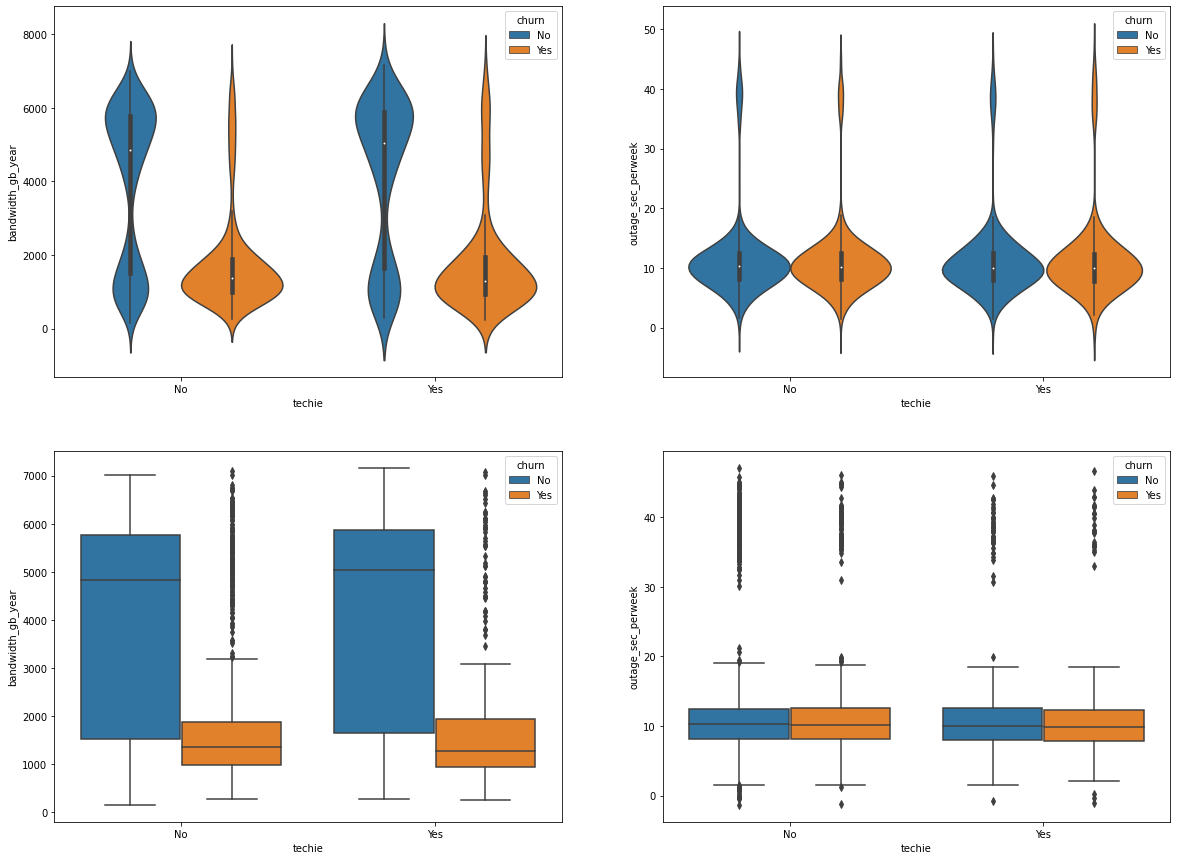

In [29]:
  fig, ax = plt.subplots(2,2,figsize=(20,15))

  p_1=sns.violinplot(data=df,x='techie',y='bandwidth_gb_year',hue='churn',ax=ax[0,0])
  
  p_2=sns.violinplot(data=df,x='techie',y='outage_sec_perweek',hue='churn',ax=ax[0,1])

  p_4=sns.boxplot(data=df,x='techie',y='bandwidth_gb_year',hue='churn',ax=ax[1,0])

  p_5=sns.boxplot(data=df,x='techie',y='outage_sec_perweek',hue='churn',ax=ax[1,1])

Observaciones:

* Quienes son techies tienen mayor proporción de abandono cuando contrata 1 other service. 

* Los techies que contratan 3 online services abandonan casi todos.

* Tanto los techies como los no techies abandonan cuando tienen 2 servicios phone.

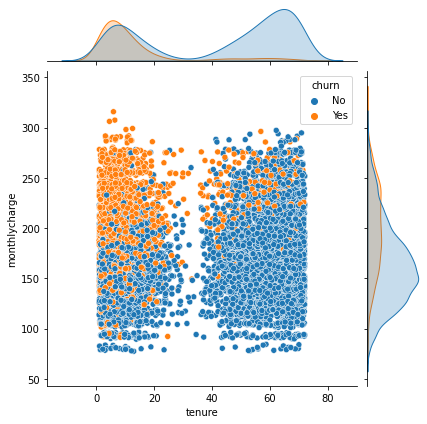

In [31]:
sns.jointplot(data=df,hue='churn',y='monthlycharge',x='tenure');

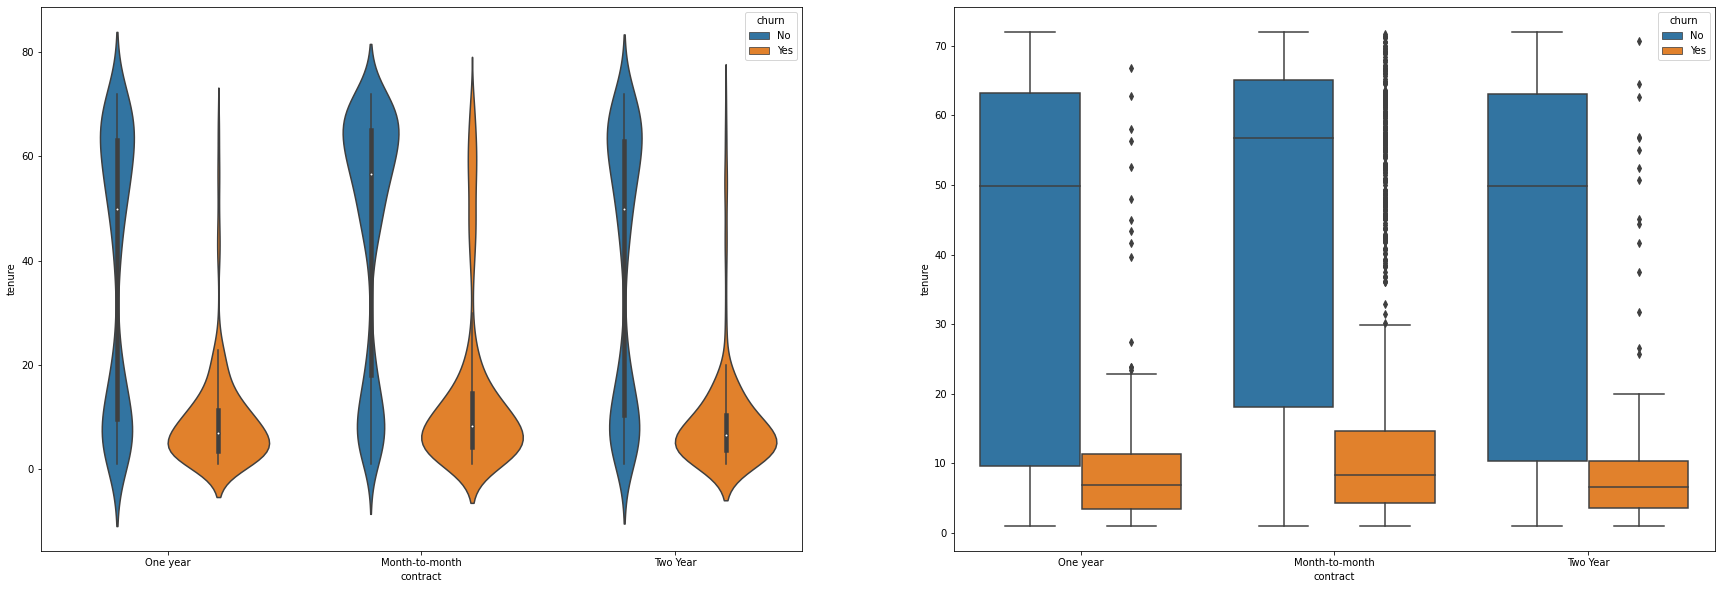

In [32]:
  fig, ax = plt.subplots(1,2,figsize=(30,10))

  p_1=sns.violinplot(data=df,x='contract',y='tenure',hue='churn',ax=ax[0])


  p_4=sns.boxplot(data=df,x='contract',y='tenure',hue='churn',ax=ax[1])

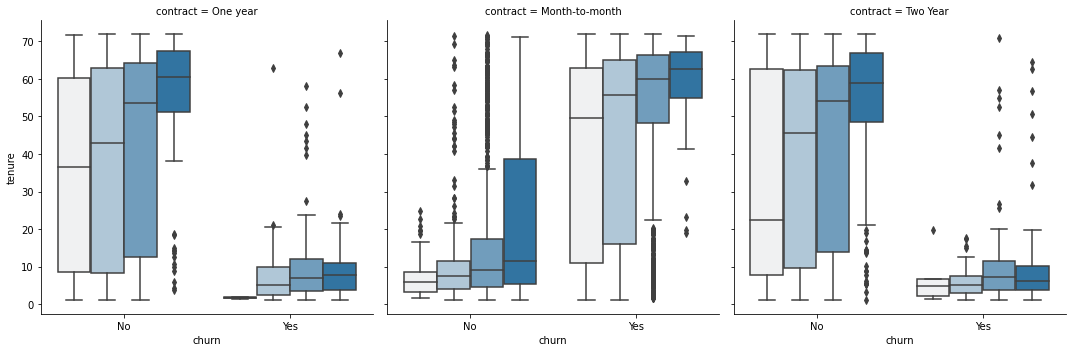

In [33]:
  g = sns.FacetGrid(df, col='contract',height=5)#,hue=var_2,palette='colorblind')
  g.map_dataframe(sns.boxplot,hue='q_other_serv',y='tenure',x='churn');

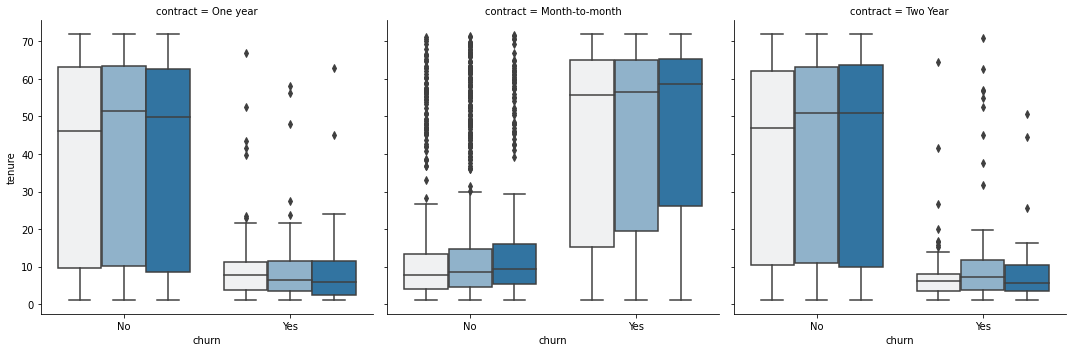

In [34]:
  g = sns.FacetGrid(df, col='contract',height=5)#,hue=var_2,palette='colorblind')
  g.map_dataframe(sns.boxplot,hue='q_online_serv',y='tenure',x='churn');

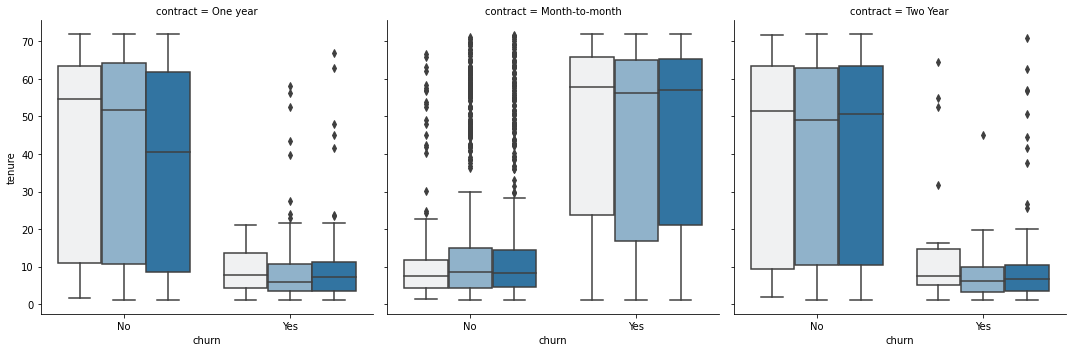

In [35]:
  g = sns.FacetGrid(df, col='contract',height=5)#,hue=var_2,palette='colorblind')
  g.map_dataframe(sns.boxplot,hue='q_phone_serv',y='tenure',x='churn');

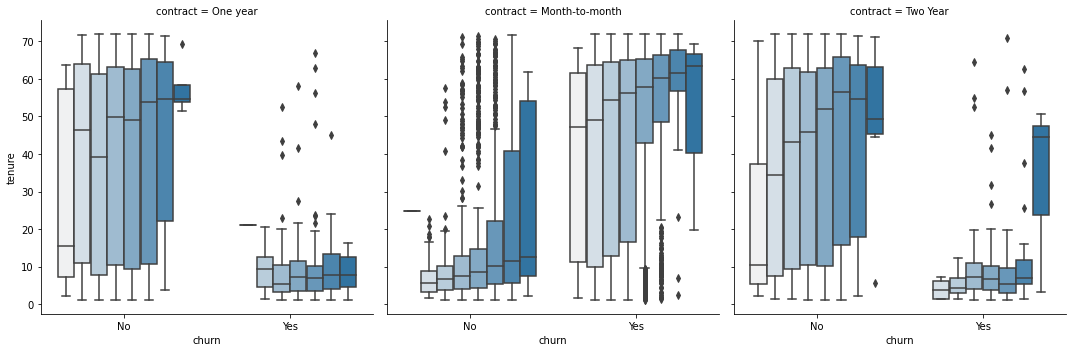

In [36]:
  g = sns.FacetGrid(df, col='contract',height=5)#,hue=var_2,palette='colorblind')
  g.map_dataframe(sns.boxplot,hue='q_total_serv',y='tenure',x='churn');

Observaciones:

En el análisis bivariado vimos que la mayoria de los contratos son month to month (56%) y tienen tenure baja y churn alta.

* Observamos que los clientes con contrato mensual que se quedaron tienen una mediana de antigüedad mayor en la empresa. Tanto para churn como para no churn, la mediana de antigüedad de los contratos mensuales es mayor a los otros dos tipos de contrato.

Sin embargo, al hacer una división por tipo de servicio, podemos ver en los month to month que:

* Quienes tienen contrato mensual y se quedan tienen una tenure baja en general, salvo quienes contratan más servicios (la mayoria de los clientes contratan 5, 3 o 4 servicios, aumentando el tenure acumulado cuando lo vemos sin la división por cantidad de productos).

* En general abandonan en tenures altos. 

Los que tienen contratos de uno o dos años abandonan en tenures bajos, en todos los servicios. Pero en el agregado de cantidad de servicios, quienes contrataron más servicios tienen una mayor mediana que los demás.

####Gráficos Multivariados (no forman parte del TP)

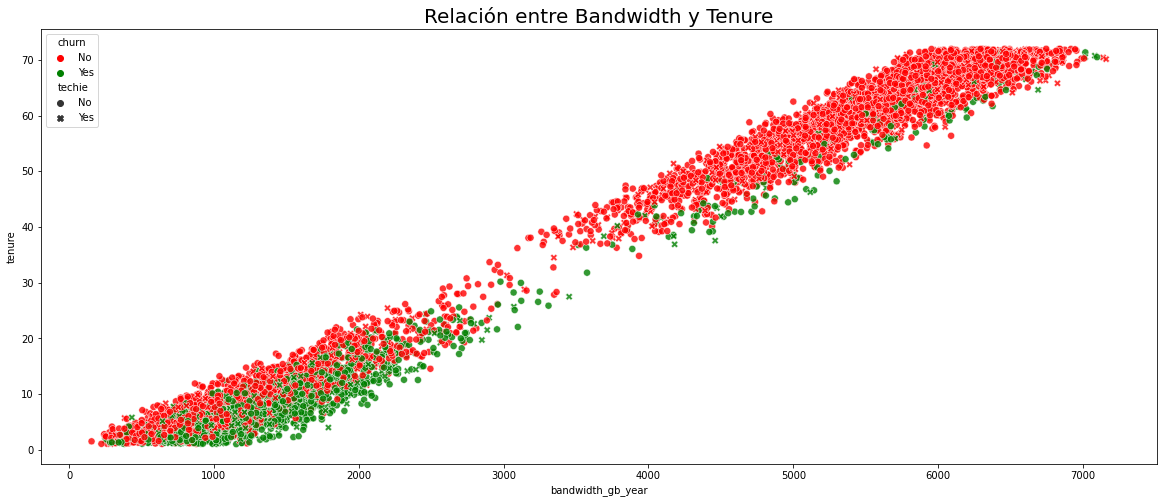

In [ ]:
p = {'Yes': 'green' , 'No' : 'red'}

plt.figure(figsize = (20,8))
sns.scatterplot(data=df, x = 'bandwidth_gb_year', y = 'tenure', hue = 'churn', style = 'techie', s =50, alpha = 0.8, palette = p)
plt.title("Relación entre Bandwidth y Tenure", size = 20)
plt.show()

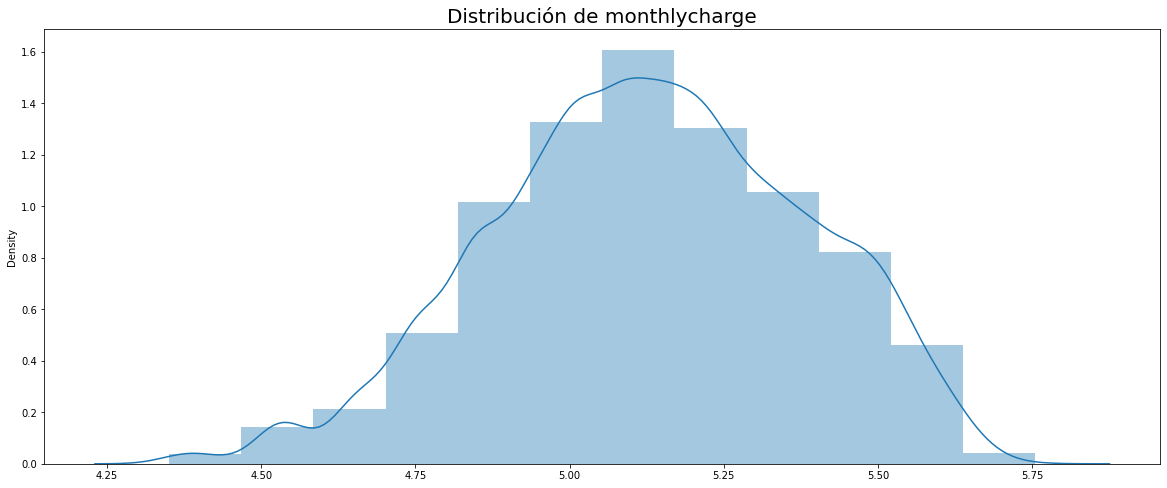

In [ ]:
plt.figure(figsize=(20,8))
sns.distplot(x = np.log(df['monthlycharge']), hist = True, bins = 12)
plt.title("Distribución de monthlycharge", size = 20);

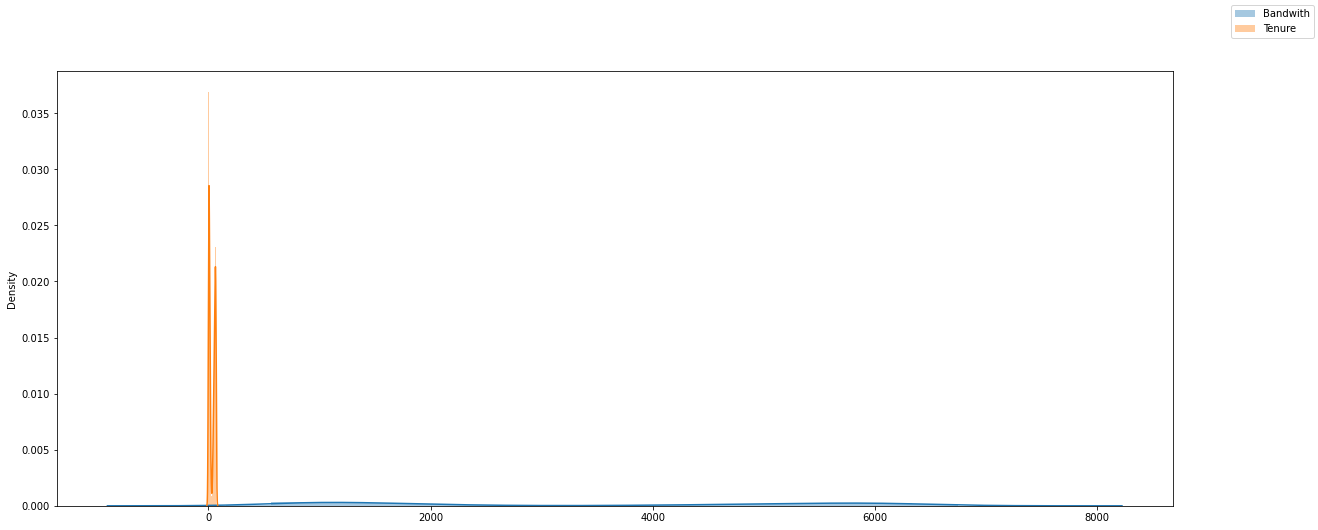

In [ ]:
fig = plt.figure(figsize=(20,8))
sns.distplot(x=df.bandwidth_gb_year,label = "Bandwith")
sns.distplot(x=df.tenure,label = "Tenure")
fig.legend();

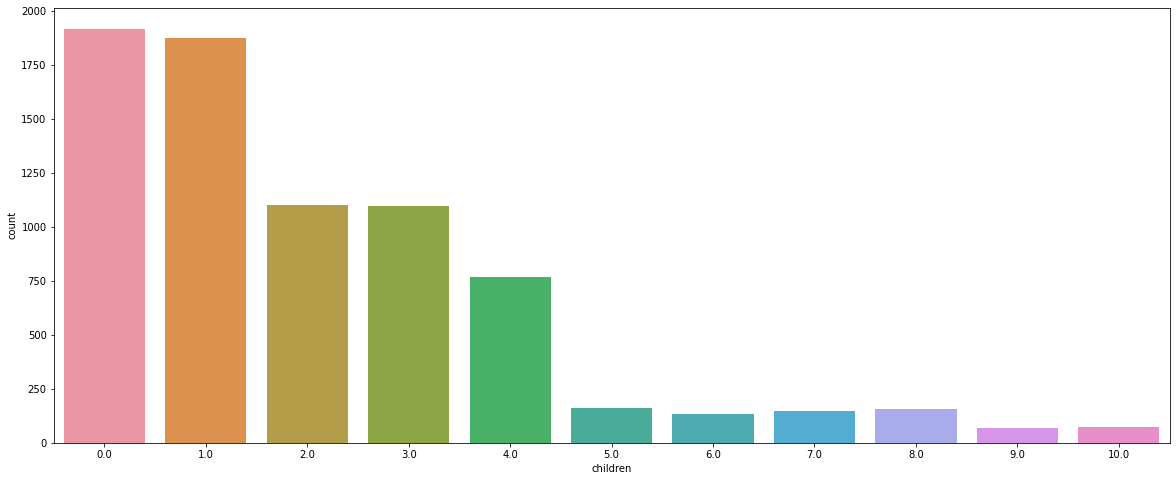

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(x=df['children']);

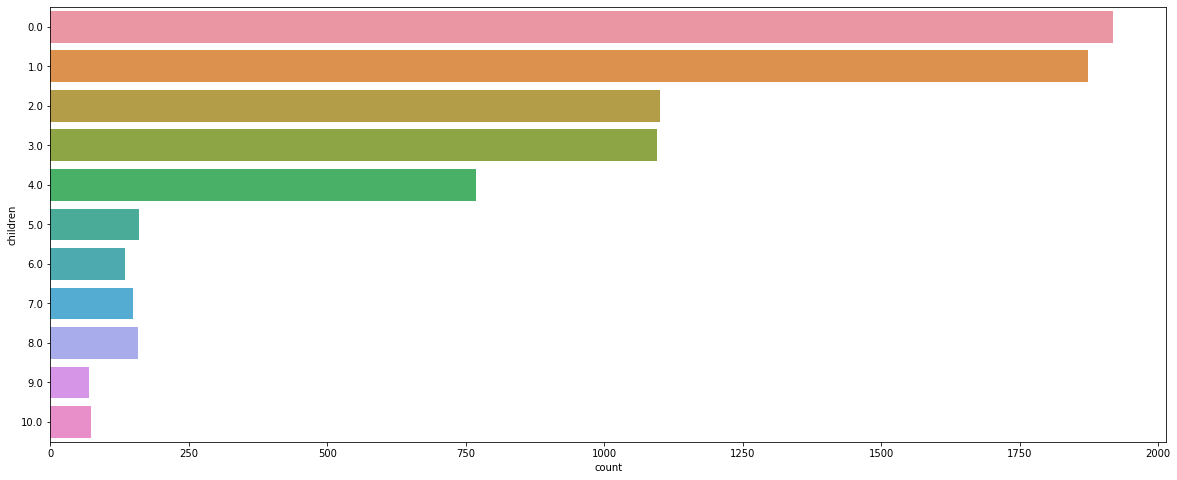

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(y=df['children']);

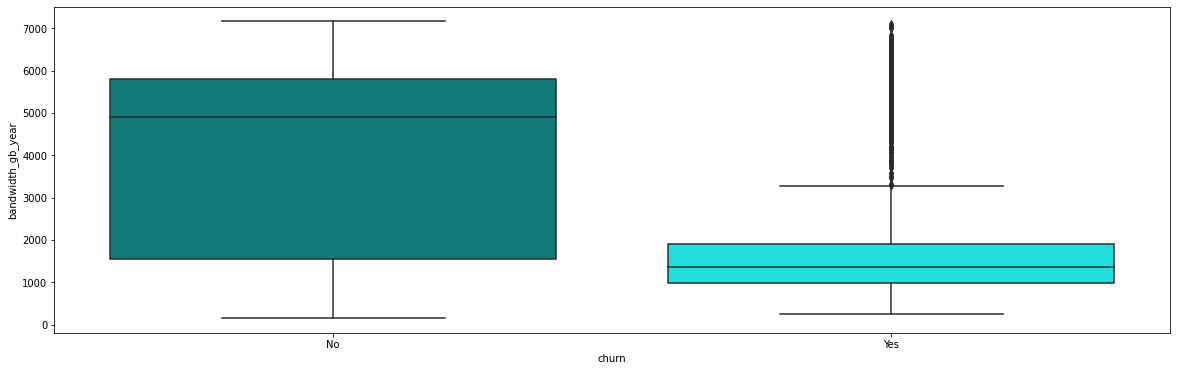

In [ ]:
plt.figure(figsize=(20,6))
sns.boxplot(x=df['churn'],y=df['bandwidth_gb_year'], palette = ["#008B8B","#00FFFF"]);

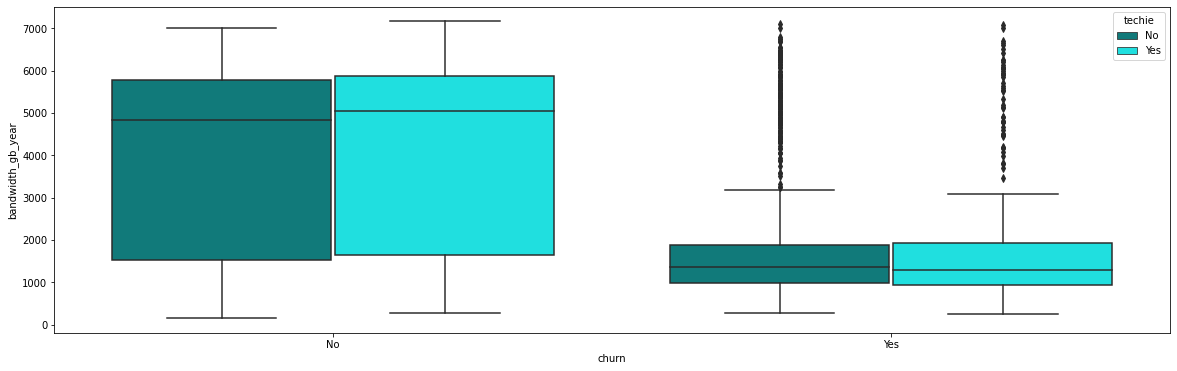

In [ ]:
plt.figure(figsize=(20,6))
sns.boxplot(x=df['churn'],y=df['bandwidth_gb_year'], palette = ["#008B8B","#00FFFF"], hue = df['techie']);

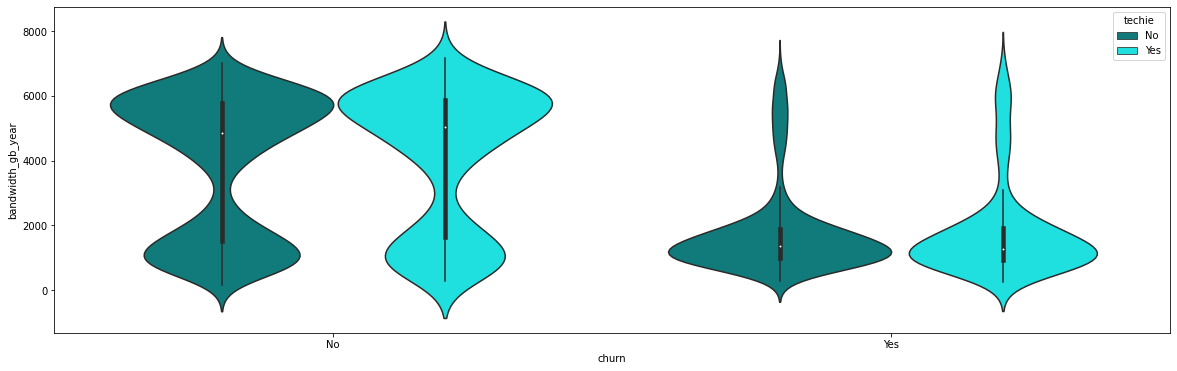

In [ ]:
plt.figure(figsize=(20,6))
sns.violinplot(x=df['churn'],y=df['bandwidth_gb_year'], palette = ["#008B8B","#00FFFF"], hue = df['techie']);

In [ ]:
plt.figure(figsize=(20,6))
px.scatter(data_frame = df,x = 'bandwidth_gb_year', y = 'tenure')

<Figure size 1440x432 with 0 Axes>

In [ ]:
px.scatter(data_frame = df,x = 'bandwidth_gb_year', y = 'tenure', color = 'churn')

In [ ]:
px.scatter(data_frame = df,x = 'bandwidth_gb_year', y = 'tenure', color = 'churn', size = 'monthlycharge')

In [ ]:
px.scatter_3d(data_frame = df,x = 'bandwidth_gb_year', y = 'tenure', z = 'monthlycharge', color = 'churn')